<a href="https://colab.research.google.com/github/swathise/homework5/blob/main/ew30050hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Q1: Compute First Two Components for First Three Students

import numpy as np
import pandas as pd

# Step 1: Sample standardized data for 3 students across 3 subjects (e.g., Math, Physics, English)
# Replace this with actual data if given
X = np.array([
    [0.5, -1.2, 0.3],    # Student 1
    [-0.3, 0.8, -0.7],   # Student 2
    [1.1, -0.4, 0.5]     # Student 3
])  # Shape: (3 students × 3 features)

# Step 2: PCA weights (loadings) for top 2 components
# Each column represents a principal component
W = np.array([
    [0.6, 0.7],    # Subject 1
    [0.4, -0.6],   # Subject 2
    [0.7, 0.4]     # Subject 3
])  # Shape: (3 features × 2 components)

# Step 3: Compute the dot product to get projected PCA scores
Z = np.dot(X, W)

# Step 4: Present as a DataFrame
df_pca = pd.DataFrame(Z, columns=['PC1', 'PC2'], index=['Student 1', 'Student 2', 'Student 3'])
print("PCA Component Scores (First 3 Students):")
df_pca

PCA Component Scores (First 3 Students):


,PC1,PC2
Student 1,0.03,1.19
Student 2,-0.35,-0.97
Student 3,0.85,1.21


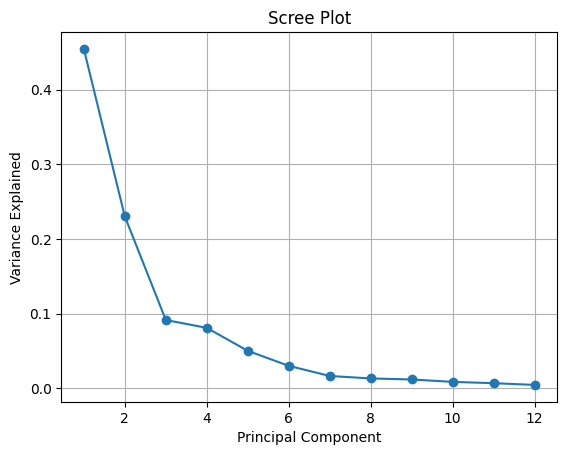

Cumulative Variance: [0.45463528 0.68492771 0.77650611 0.85752964 0.90776764 0.93793075
 0.95452404 0.96783313 0.97974612 0.98843228 0.99537851 1.        ]
         0         1         2         3         4         5         6   \
0  2.308365 -0.931713  0.057042  2.292632  0.373401 -0.860491  0.698127   
1 -2.034947 -2.803698  1.675399  1.155492 -0.805882  0.460336  0.030189   
2 -2.552441 -2.012644  2.687010  0.521291 -0.164976  0.426913 -0.271561   
3 -1.638918 -0.438149  1.718712  1.365928  0.127042  0.208062 -0.471407   
4 -0.221407 -2.673904  0.400004  2.103663 -0.004738  1.094805 -0.157765   

         7         8         9         10        11  
0 -0.070821  0.250047 -0.221815  0.171945 -0.096920  
1 -0.460140 -0.723536 -0.720846  0.049635  0.245461  
2  0.297512  0.433693 -0.355521  0.280934  0.043486  
3  0.128870 -0.286339  0.433536  0.112368 -0.006389  
4 -0.030095 -0.451535  1.034062 -0.030670 -0.532711  


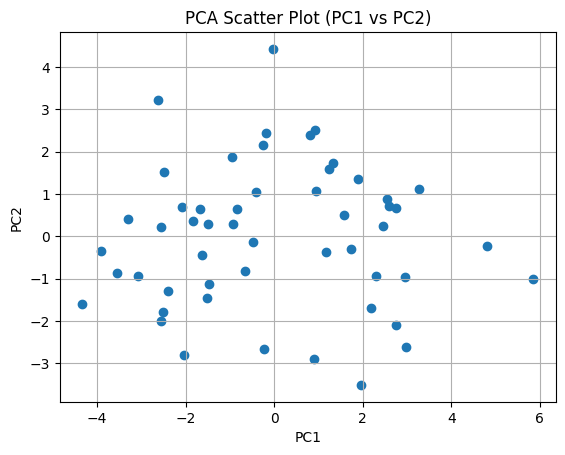

In [2]:
-- Q2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load Dataset
df = pd.read_csv('/content/roles_life_cycle_mapping_wide.csv')  # replace with actual filename

# Step 2: Identify and drop non-numerical columns or select only numerical columns
# You can inspect the DataFrame to see which columns are not numerical using df.info() or df.dtypes
# For this example, let's assume 'Job_Title' is the non-numerical column causing the issue.
# If there are other non-numerical columns, add them to the list.
numerical_df = df.select_dtypes(include=['number']) # Selects only numerical columns

# Alternatively, if you want to drop specific columns by name:
# columns_to_drop = ['Job_Title'] # Add other non-numerical column names here if necessary
# numerical_df = df.drop(columns=columns_to_drop)

# Step 3: Standardization - Apply scaler to the numerical DataFrame
X = StandardScaler().fit_transform(numerical_df)

# Step 4: PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 5: Scree Plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

# Step 6: Variance Retention
cum_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Variance:", cum_variance)

# Step 7: Output Transformed Data
# Create DataFrame from PCA results, preserving original index if needed
df_pca = pd.DataFrame(X_pca, index=numerical_df.index)
print(df_pca.head())

# Step 8: Scatter Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd # Ensure pandas is imported in this cell if it's the first cell using it

df = pd.read_csv('/content/BMI.csv')

# Removed 'age' from the list of columns to drop as it's not found in the BMI dataset
X = df.drop(['fatpctg'], axis=1)
y = df['fatpctg']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("Top features (Wrapper):", X.columns[fit.support_])

from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index=X.columns)
top_features_embedded = coef.abs().sort_values(ascending=False).head(5).index
print("Top features (Embedded):", top_features_embedded)

# Removed 'age' from the list of columns to drop when calculating correlations
correlations = df.corr()['fatpctg'].drop(['fatpctg']).abs()
top_features_filter = correlations.sort_values(ascending=False).head(5).index
print("Top features (Filter):", top_features_filter)

Top features (Wrapper): Index(['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist'], dtype='object')
Top features (Embedded): Index(['Wrist', 'Abdomen', 'Neck', 'Forearm', 'Thigh'], dtype='object')
Top features (Filter): Index(['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh'], dtype='object')
